<h2>Project 2 - Using machine learning techniques to determine if the data packets transmitted through the network are normal or malicious.</h2>

<p style='font-size: 18px; font-weight: bold;'>Team Members:</p>
<p style='font-size: 16px;'>
        &emsp;&emsp;- Parsis Presswala<br>
        &emsp;&emsp;- Bablu Prajapat<br>
        &emsp;&emsp;- Shakti Singh Rathore<br>
        &emsp;&emsp;- Sourav Gajbhiye<br>
        &emsp;&emsp;- Nikhil Gaikwad<br>
</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h2>Dataset Description</h2>

In [2]:
data_desc = pd.read_csv('UNSW-NB15_features.csv')
pd.set_option('display.max_colwidth', -1)
data_desc

,No.,Name,Type,Description
0,1,srcip,nominal,Source IP address
1,2,sport,integer,Source port number
2,3,dstip,nominal,Destination IP address
3,4,dsport,integer,Destination port number
4,5,proto,nominal,Transaction protocol
5,6,state,nominal,"Indicates to the state and its dependent protocol, e.g. ACC, CLO, CON, ECO, ECR, FIN, INT, MAS, PAR, REQ, RST, TST, TXD, URH, URN, and (-) (if not used state)"
6,7,dur,Float,Record total duration
7,8,sbytes,Integer,Source to destination transaction bytes
8,9,dbytes,Integer,Destination to source transaction bytes
9,10,sttl,Integer,Source to destination time to live value


### Reading the input file.

In [3]:
df = pd.read_csv('UNSW_NB15_complete-set.csv')
df.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,NaN,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,NaN,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,NaN,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,NaN,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


### Seperating the features and class variable

In [4]:
X = df.drop(['id', 'label'], axis=1)
y = df[['label']]

### Exploratory Data Analysis

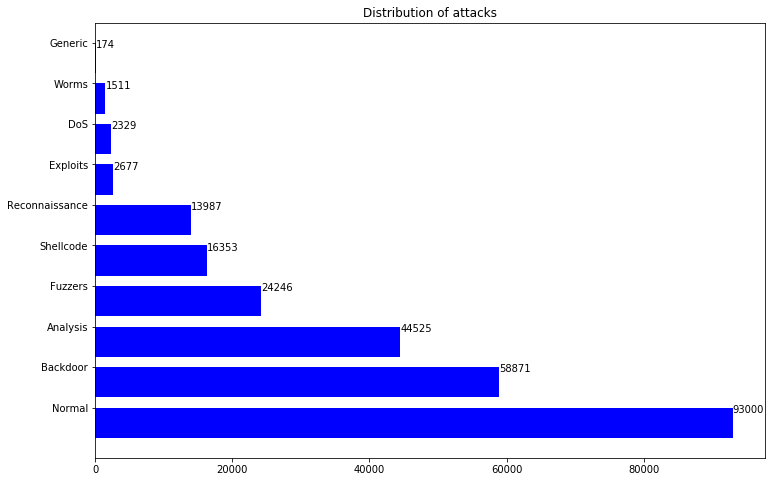

In [5]:
a = X.attack_cat.unique()
b = X.attack_cat.value_counts()
fig, ax = plt.subplots(figsize=(12, 8))    
width = 0.75 # the width of the bars 
ind = np.arange(len(b))  # the a locations for the groups
ax.barh(ind, b, width, color="blue")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(a, minor=False)
plt.title('Distribution of attacks')
#plt.xlabel('a')
#plt.ylabel('b')
for i, v in enumerate(b):
    ax.text(v + 3, i + .25, str(v))

#### Distribution of attacks.

### Proportion of different types of attacks

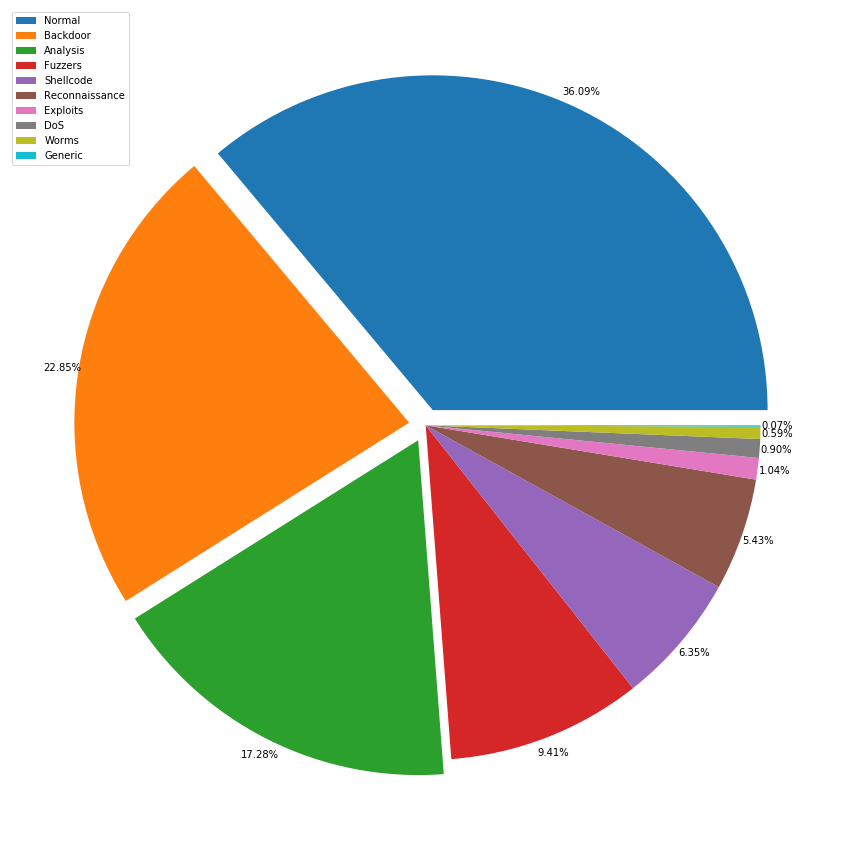

In [6]:
plt.figure(figsize=(15, 18))
attack_cat_value_counts = X.attack_cat.value_counts()
explode = (0.05, 0.05, 0.05, 0, 0, 0, 0, 0, 0, 0)
plt.pie(attack_cat_value_counts, autopct='%.2f%%', pctdistance=1.05, explode=explode)
plt.legend(labels=X.attack_cat.unique())
plt.show()

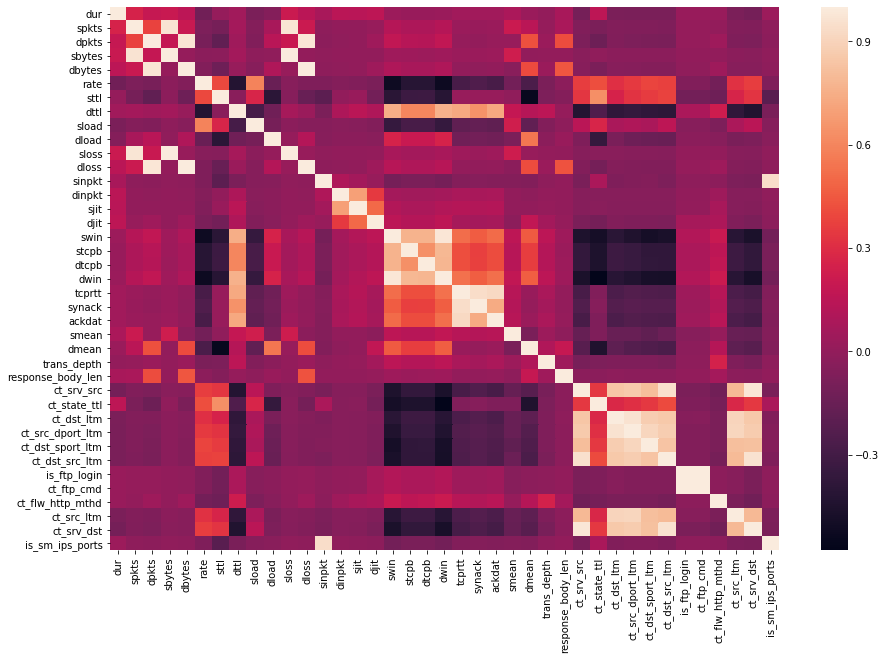

In [7]:
plt.figure(figsize=(15,10))
sns.heatmap(X.corr(method='pearson'))
plt.show()

In [8]:
X.corr(method='pearson')

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports
dur,1.000000,0.258890,0.188382,0.204422,0.149705,-0.118622,0.008617,0.053580,-0.079202,-0.049026,...,-0.080883,-0.090267,-0.088422,-0.090921,0.020390,0.020330,0.023299,-0.079126,-0.107793,0.034025
spkts,0.258890,1.000000,0.383221,0.964393,0.203804,-0.073668,-0.099579,0.063234,-0.049232,0.075482,...,-0.056025,-0.063234,-0.066604,-0.072036,0.010114,0.010135,0.004430,-0.057480,-0.066118,-0.016565
dpkts,0.188382,0.383221,1.000000,0.184280,0.973445,-0.093065,-0.183142,0.047416,-0.062484,0.137395,...,-0.065177,-0.078324,-0.084943,-0.087176,0.013203,0.013231,0.039567,-0.069019,-0.073238,-0.019895
sbytes,0.204422,0.964393,0.184280,1.000000,0.009969,-0.027353,-0.019939,0.058397,-0.017320,-0.007372,...,-0.025157,-0.024496,-0.024965,-0.029291,-0.003931,-0.003929,-0.002900,-0.025494,-0.033095,-0.005903
dbytes,0.149705,0.203804,0.973445,0.009969,1.000000,-0.055538,-0.128600,0.019371,-0.037318,0.103487,...,-0.038026,-0.046258,-0.050583,-0.050668,-0.009145,-0.009139,0.042458,-0.041286,-0.041118,-0.011842
rate,-0.118622,-0.073668,-0.093065,-0.027353,-0.055538,1.000000,0.400967,-0.426766,0.587503,-0.148204,...,0.315193,0.350931,0.383672,0.376051,-0.062572,-0.062543,-0.110000,0.316011,0.364168,-0.068433
sttl,0.008617,-0.099579,-0.183142,-0.019939,-0.128600,0.400967,1.000000,-0.032471,0.269001,-0.393943,...,0.254498,0.325302,0.358632,0.380792,-0.114584,-0.114647,-0.131152,0.261206,0.328775,-0.210860
dttl,0.053580,0.063234,0.047416,0.058397,0.019371,-0.426766,-0.032471,1.000000,-0.285242,-0.124192,...,-0.380788,-0.361507,-0.380438,-0.392213,0.089394,0.089009,0.217831,-0.378975,-0.437934,-0.090447
sload,-0.079202,-0.049232,-0.062484,-0.017320,-0.037318,0.587503,0.269001,-0.285242,1.000000,-0.101924,...,0.081328,0.104451,0.083601,0.155950,-0.041925,-0.041906,-0.073513,0.092978,0.147013,-0.045732
dload,-0.049026,0.075482,0.137395,-0.007372,0.103487,-0.148204,-0.393943,-0.124192,-0.101924,1.000000,...,-0.090468,-0.133032,-0.141630,-0.150901,-0.025128,-0.025078,-0.039760,-0.087498,-0.078100,-0.032833


### Finding features with highest correlation.

In [9]:
corr_matrix = X.corr(method='pearson')
corr_columns = corr_matrix.columns
corr_list = []

for i in range(corr_matrix.shape[0]):
    for j in range(i+1, corr_matrix.shape[0]):
        if corr_matrix.iloc[i,j]>0.9:
            corr_list.append([corr_columns[i], corr_columns[j], round(corr_matrix.iloc[i,j], 4)])

pd.DataFrame(corr_list)

,0,1,2
0,spkts,sbytes,0.9644
1,spkts,sloss,0.9719
2,dpkts,dbytes,0.9734
3,dpkts,dloss,0.9796
4,sbytes,sloss,0.9958
5,dbytes,dloss,0.9967
6,sinpkt,is_sm_ips_ports,0.9421
7,swin,dwin,0.9805
8,tcprtt,synack,0.9431
9,tcprtt,ackdat,0.9202


<h4>Features with highest correlation are as follows:</h4>
<ul>
    <li>spkts, sbytes, sloss</li>
    <li>dpkts, dbytes, dloss</li>
    <li>sinpkt, is_sm_ips_ports</li>
    <li>swin, dwin</li>
    <li>tcprtt, synack</li>
    <li>ct_srv_src, ct_srv_dst, ct_dst_src_ltm</li>
    <li>is_ftp_login, ct_ftp_cmd</li>
</ul>

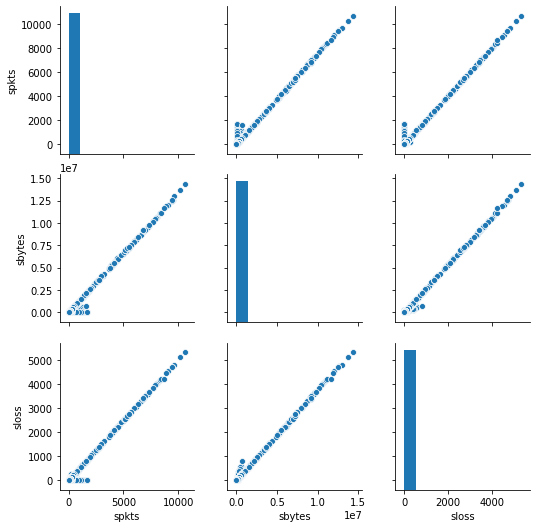

In [10]:
sns.pairplot(X[['spkts', 'sbytes', 'sloss']])
plt.show()

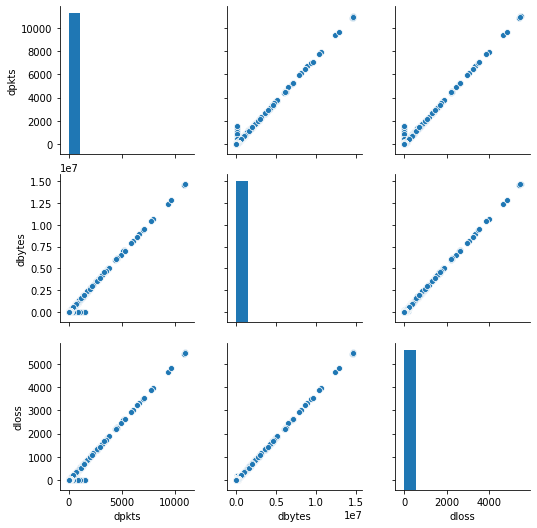

In [11]:
sns.pairplot(X[['dpkts', 'dbytes', 'dloss']])
plt.show()

### Handling Categorical Variables

In [12]:
df2 = df.copy()

df2['proto'] = df2['proto'].astype('category')
df2['service'] = df2['service'].astype('category')
df2['state'] = df2['state'].astype('category')
df2['attack_cat'] = df2['attack_cat'].astype('category')

In [13]:
df2['proto'] = df2['proto'].cat.codes
df2['service'] = df2['service'].cat.codes
df2['state'] = df2['state'].cat.codes
df2['attack_cat'] = df2['attack_cat'].cat.codes

In [14]:
df2.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,113,-1,4,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,6,0
1,2,0.649902,113,-1,4,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,6,0
2,3,1.623129,113,-1,4,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,6,0
3,4,1.681642,113,2,4,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,6,0
4,5,0.449454,113,-1,4,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,6,0


In [15]:
X = df2.drop(['id', 'label'], axis=1)
y = df2['label']

### Splitting data into training and testing sets

In [16]:
from sklearn.model_selection import train_test_split

seed = 10
test_size = 0.3

X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=test_size, random_state=seed)

In [17]:
from sklearn.preprocessing import MinMaxScaler

scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
X_train = scaling.transform(X_train)
X_test = scaling.transform(X_test)

### Implementing SVM Classifier

In [18]:
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import classification_report

clf = svm.SVC(kernel='linear') # Linear Kernel

clf.fit(X_train, y_train)

SVC(kernel='linear')

### Training Scores

In [19]:
y_train_pred = clf.predict(X_train)

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_train, y_train_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_train, y_train_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_train, y_train_pred))

Accuracy: 0.9489275827274845
Precision: 0.9636520276507149
Recall: 0.9557318685789848


### Testing Scores

In [20]:
y_test_pred = clf.predict(X_test)

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_test_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_test_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_test_pred))

Accuracy: 0.9503024322091689
Precision: 0.965341951262119
Recall: 0.9567513287972437


### Classification Report

In [22]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93     64853
           1       0.97      0.96      0.96    115518

    accuracy                           0.95    180371
   macro avg       0.94      0.95      0.95    180371
weighted avg       0.95      0.95      0.95    180371



### Hyperparameter Tuning using GridSearchCV

In [24]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [0.1, 1, 10, 100], 
              'kernel': ['sigmoid', 'rbf', 'poly']}

grid = GridSearchCV(svm.SVC(), param_grid, refit=True, verbose=2, n_jobs=-1)

grid.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 14.5min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 97.3min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed: 135.1min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [0.1, 1, 10, 100],
                         'kernel': ['sigmoid', 'rbf', 'poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

#### Best Parameters

In [25]:
grid.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'poly'}

### Model Implementation Using The Best Parameters Obtained via GridSearchCV

In [23]:
clf_2 = svm.SVC(kernel='poly', C=0.1, gamma=1)

clf_2.fit(X_train, y_train)

SVC(C=0.1, gamma=1, kernel='poly')

### Training Values

In [24]:
y_train_pred = clf_2.predict(X_train)

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_train, y_train_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_train, y_train_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_train, y_train_pred))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0


### Testing Values

In [25]:
y_test_pred = clf_2.predict(X_test)

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_test_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_test_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_test_pred))

Accuracy: 0.9999722793575464
Precision: 0.9999567185755217
Recall: 1.0


### Classification Report

In [26]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     64853
           1       1.00      1.00      1.00    115518

    accuracy                           1.00    180371
   macro avg       1.00      1.00      1.00    180371
weighted avg       1.00      1.00      1.00    180371

